##importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


---

# Dataset Preparation for Image Classification

This script prepares image datasets for training, validation, and testing, performing the following key steps:
1. **Image Path Collection**: Collects paths to all images and their respective labels from a directory structure.
2. **Label Encoding**: Converts class names to numerical labels for model compatibility.
3. **Dataset Splitting**: Splits data into training, validation, and test sets while maintaining class distribution.
4. **File Organization**: Copies images into respective directories (`train`, `val`, `test`) organized by class.
5. **Dataset Loading**: Loads the prepared datasets using TensorFlow utilities for further use in model training.

---

## Code Breakdown

### 1. Importing Necessary Libraries
The script uses libraries like `os` and `shutil` for file operations, `numpy` for numerical computations, `tensorflow` for deep learning utilities, and `scikit-learn` for dataset splitting and label encoding.

---

### 2. Defining Paths and Image Parameters
Paths for the dataset and its splits are defined, along with image dimensions (`224x224`) and batch size (`28`).

---

### 3. Collecting Image Paths and Labels
The script scans the dataset directory, collects file paths of supported image formats, and associates each file with its class label. It skips non-image files and outputs the total number of images found.

---

### 4. Encoding Class Labels
Class labels (e.g., folder names) are converted into numerical values using `LabelEncoder`. This step ensures compatibility with machine learning models.

---

### 5. Splitting the Dataset
The dataset is split into:
- **Training Set**: Used for training the model.
- **Validation Set**: Used to tune the model and avoid overfitting.
- **Test Set**: Used for final evaluation.

Stratified splitting ensures class distribution remains consistent across splits.

---

### 6. Organizing Files into Directories
Images are copied into separate directories (`train`, `val`, `test`), organized by class. This structure is required for TensorFlow's dataset utilities.

---

### 7. Loading Datasets with TensorFlow
The `image_dataset_from_directory` function loads datasets directly from the organized directories:
- **Training Dataset**: Shuffled for randomness during training.
- **Validation and Test Datasets**: Not shuffled to ensure consistency.

Images are resized to `224x224` and batched for efficient processing.

---

### 8. Printing Dataset Details
The script outputs the number of batches for training, validation, and test datasets to verify successful loading.

---


In [3]:
import os
import shutil
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Define paths
data_train_path = 'D:/Data Science/Infosys Project/Final_dataset'
data_split_path = 'D:/Data Science/Infosys Project'

# Image dimensions
img_width, img_height = 224, 224
batch_size = 28

# Collect image paths and labels
image_paths = []
labels = []

# Supported image formats
supported_formats = ('.png', '.jpg', '.jpeg')

for class_name in os.listdir(data_train_path):
    class_dir = os.path.join(data_train_path, class_name)
    if os.path.isdir(class_dir):
        for filename in os.listdir(class_dir):
            if filename.lower().endswith(supported_formats):
                image_paths.append(os.path.join(class_dir, filename))
                labels.append(class_name)
            else:
                print(f"Skipped non-image file: {filename} in {class_name}")

print(f"Found {len(image_paths)} images.")

# If no images are found, stop execution
if len(image_paths) == 0:
    raise ValueError("No image files found in the specified training directory. Please check the directory structure.")

# Convert labels to a numpy array
labels = np.array(labels)

# Encode labels to integers
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)  # Converts class names to integers
print("Classes:", encoder.classes_)  # ['amitabh bachchan', 'mahesh babu', 'modi', 'rohit shrama']

# Split dataset into training and remaining (validation + test)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(
    image_paths, labels, test_size=0.3, random_state=42, stratify=labels
)

# Split remaining into validation and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp
)

# Create output directories
os.makedirs(data_split_path, exist_ok=True)

for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(data_split_path, split), exist_ok=True)

# Function to copy files to respective directories
def copy_files(file_list, split_dir):
    for file in file_list:
        class_name = os.path.basename(os.path.dirname(file))
        dest_dir = os.path.join(data_split_path, split_dir, class_name)
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(file, dest_dir)

# Copy files to train, val, and test directories
copy_files(X_train_temp, 'train')
copy_files(X_val, 'val')
copy_files(X_test, 'test')

# Load the datasets
data_train = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_split_path, 'train'),
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

data_val = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_split_path, 'val'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

data_test = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_split_path, 'test'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

# Print dataset details
print(f"Training dataset: {len(data_train)} batches")
print(f"Validation dataset: {len(data_val)} batches")
print(f"Test dataset: {len(data_test)} batches")


Found 2175 images.
Classes: ['Amitabh Bachchan' 'Narendra Modi' 'Rohit Sharama' 'Virat Kholi']
Found 1522 files belonging to 4 classes.
Found 457 files belonging to 4 classes.
Found 196 files belonging to 4 classes.
Training dataset: 55 batches
Validation dataset: 17 batches
Test dataset: 7 batches


## Dataset Paths

**In this section, we define the file paths for our datasets.**
- These paths will be used to load the **training, testing, and validation** images for our image classification project.

In [4]:
data_train_path = 'D:/Data Science/Infosys Project/train'
data_test_path = 'D:/Data Science/Infosys Project/test'
data_val_path = 'D:/Data Science/Infosys Project/val'

In [5]:
img_width = 180
img_height =180 

## Loading Image Datasets

In this section, we utilize TensorFlow's `image_dataset_from_directory` function to load our training, validation, and testing datasets. This function automatically labels images based on their directory structure.


In [20]:
# Load training data
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=True  # Shuffle training data for better learning
)

Found 1522 files belonging to 4 classes.



### Loading the Training Dataset

In [7]:
data_cat = data_train.class_names

### Extracting Class Names

In [8]:
data_cat

['Amitabh Bachchan', 'Narendra Modi', 'Rohit Sharama', 'Virat Kholi']

### Loading the Validation Dataset

In [21]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 457 files belonging to 4 classes.


### Loading the Testing Dataset

In [22]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 196 files belonging to 4 classes.


In [23]:
# Get class names
data_cat = data_train.class_names
print(f"Classes: {data_cat}")

Classes: ['Amitabh Bachchan', 'Narendra Modi', 'Rohit Sharama', 'Virat Kholi']


### Visualizing Training Images

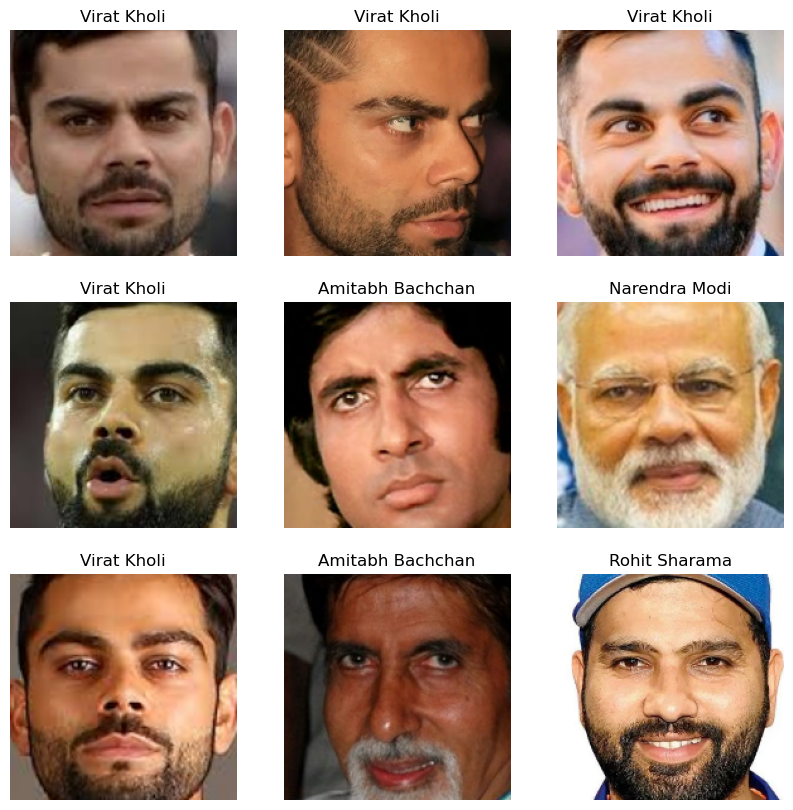

In [24]:
import matplotlib.pyplot as plt

# Visualize some training images
plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):  # Take 1 batch of data
    for i in range(9):  # Show 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))  # Convert to uint8 for visualization
        plt.title(data_cat[labels[i]])  # Show class label
        plt.axis('off')
plt.show()


## Building and Training a Convolutional Neural Network (CNN)

In this section, we will define, compile, and train a convolutional neural network (CNN) using TensorFlow and Keras.

In [12]:
from tensorflow.keras.models import Sequential

### Inspecting the Training Data

In [13]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Defining the CNN Model

In [17]:
from tensorflow.keras import layers, Sequential

# Build the CNN model
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Normalize images
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),  # Increased dropout to avoid overfitting
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_cat), activation='softmax')  # Output layer with softmax
])


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compiling the Model

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Softmax used
    metrics=['accuracy']
)


In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Apply data augmentation to the training dataset
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescaling for validation and test datasets
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

### Training the Model.

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Set number of epochs
epochs_size = 25

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True)  # Updated to .keras
]

# Train the model
history = model.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs_size,
    callbacks=callbacks
)


Epoch 1/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 45s 882ms/step - accuracy: 0.5036 - loss: 1.1763 - val_accuracy: 0.9081 - val_loss: 0.2470
Epoch 2/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 40s 829ms/step - accuracy: 0.9045 - loss: 0.2579 - val_accuracy: 0.9015 - val_loss: 0.2560
Epoch 3/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 852ms/step - accuracy: 0.9604 - loss: 0.1351 - val_accuracy: 0.9628 - val_loss: 0.0985
Epoch 4/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 856ms/step - accuracy: 0.9715 - loss: 0.0824 - val_accuracy: 0.9759 - val_loss: 0.0713
Epoch 5/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 40s 837ms/step - accuracy: 0.9796 - loss: 0.0562 - val_accuracy: 0.9825 - val_loss: 0.0417
Epoch 6/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 40s 830ms/step - accuracy: 0.9893 - loss: 0.0262 - val_accuracy: 0.9847 - val_loss: 0.0641
Epoch 7/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 43s 889ms/step - accuracy: 0.9970 - loss: 0.0178 - val_accuracy: 0.9912 - val_loss: 0.0383
Epoch 8/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 42s 880ms/step - accuracy: 0.9960 - loss: 0.0110 - val_accu

In [31]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(data_test)
print(f"Test Accuracy: {test_acc:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.9876 - loss: 0.1438
Test Accuracy: 0.98


### Visualizing Training History.

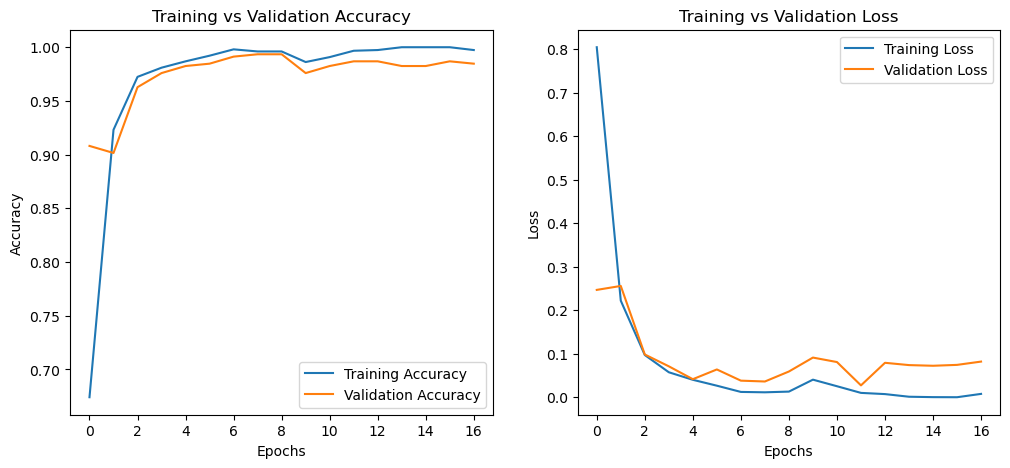

In [32]:
# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [33]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels and predictions
true_labels = np.concatenate([labels for _, labels in data_test])
predictions = np.argmax(model.predict(data_test), axis=-1)

# Print classification report
print(classification_report(true_labels, predictions, target_names=data_cat))

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(cm)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step
                  precision    recall  f1-score   support

Amitabh Bachchan       0.98      1.00      0.99        55
   Narendra Modi       1.00      0.97      0.98        33
   Rohit Sharama       0.97      0.97      0.97        33
     Virat Kholi       0.99      0.99      0.99        75

        accuracy                           0.98       196
       macro avg       0.98      0.98      0.98       196
    weighted avg       0.98      0.98      0.98       196

Confusion Matrix:
[[55  0  0  0]
 [ 1 32  0  0]
 [ 0  0 32  1]
 [ 0  0  1 74]]


### Making Predictions

In [50]:
image = "D:/Data Science/Infosys Project/train/Virat Kholi/Virat Kholi3.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [51]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


## Making Predictions and Displaying Results

After loading and preparing the image, we can use the trained model to predict the class of the image. The following code applies the softmax function to the predictions and displays the predicted class along with its confidence.

In [52]:
score = tf.nn.softmax(predict)

In [53]:
print('The Person is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

The Person is Virat Kholi with accuracy of 47.53


In [2]:
#model.save('Image_classify_new1.keras')